
# Generating Movie Recommendations

### Unsupervised_Learning_ZM6

1. Noxolo Ngcobo
2. Mora Magakwe
3. Sandra Malope
4. Katleho Moketo
5. Shuaib Morris
6. Matthews Montle


## Introduction

Recommendation systems are becoming increasingly important in today’s extremely busy world. People are forever short on time due to the tasks they need to accomplish in the limited time they have. Therefore, the recommendation systems are very important as they assist in making the right choices.

The purpose of a recommendation system basically is to search for content that would be interesting to an individual. Moreover, it involves a number of factors to create personalised lists of useful and interesting content specific to each user/individual. Recommendation systems are Artificial Intelligence based algorithms that skim through all possible options and create a customized list of items that are interesting and relevant to an individual. These results are based on their profile, search/browsing history, what other people with similar traits/demographics are watching, and how likely are you to watch those movies. This is achieved through predictive modeling and heuristics with the data available.

With this context, EDSA is challenging us to construct a recommendation algorithm based on content or collaborative filtering, capable of accurately predicting how a user will rate a movie they have not yet viewed based on their historical preferences.

Providing an accurate and robust solution to this challenge has immense economic potential, with users of the system being exposed to content they would like to view or purchase - generating revenue and platform affinity.

# Start Comet Experiment

In [3]:
# import comet_ml at the top of your file
from comet_ml import Experiment

# Create an experiment with your api key
experiment = Experiment(
    api_key="AIsuZdtd29SWcjxrZNuYXACJH",
    project_name="comet-zm6",
    workspace="kmoketo-dev",
)

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/kmoketo-dev/comet-zm6/4c1f27ee56904ed9abe6a2c3756de3ed



In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Installing packages
Please download all relevant packages in. There is no terminal so you will pip install everything.

You can find a list of recommended install from the Intro to Recommender sysytem notebook.

In [2]:
# Install packages here
# Packages for data processing
import numpy as np
import pandas as pd
import datetime
from sklearn import preprocessing
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import re
from scipy.sparse import csr_matrix
import scipy as sp


# Packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Packages for modeling
from surprise import Reader
from surprise import Dataset
from surprise import KNNWithMeans
from surprise import KNNBasic
from surprise.model_selection import cross_validate
from surprise.model_selection import GridSearchCV
from surprise import SVD
from surprise import SVDpp
from surprise import NMF
from surprise import SlopeOne
from surprise import CoClustering
import heapq

# Packages for model evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from time import time
from surprise import accuracy
from sklearn.metrics import mean_squared_error
from surprise.model_selection import GridSearchCV, cross_validate, train_test_split

# Package to suppress warnings
import warnings
warnings.filterwarnings("ignore")

# Packages for saving models
import pickle

## Reading in data

In [3]:
# df_sample_submission = pd.read_csv('/kaggle/input/edsa-movie-recommendation-challenge/sample_submission.csv')
# df_movies = pd.read_csv('/kaggle/input/edsa-movie-recommendation-challenge/movies.csv')
# df_imdb = pd.read_csv('/kaggle/input/edsa-movie-recommendation-challenge/imdb_data.csv')
# df_genome_scores = pd.read_csv('/kaggle/input/edsa-movie-recommendation-challenge/genome_scores.csv')
# df_genome_tags = pd.read_csv('/kaggle/input/edsa-movie-recommendation-challenge/genome_tags.csv')
# df_train = pd.read_csv('/kaggle/input/edsa-movie-recommendation-challenge/train.csv')
# df_test = pd.read_csv('/kaggle/input/edsa-movie-recommendation-challenge/test.csv')
# df_tags = pd.read_csv('/kaggle/input/edsa-movie-recommendation-challenge/tags.csv')
# df_links = pd.read_csv('/kaggle/input/edsa-movie-recommendation-challenge/links.csv')

In [24]:
df_sample_submission = pd.read_csv('sample_submission.csv')
df_movies = pd.read_csv('movies.csv')
df_imdb = pd.read_csv('imdb_data.csv')
df_genome_scores = pd.read_csv('genome_scores.csv')
df_genome_tags = pd.read_csv('genome_tags.csv')
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_tags = pd.read_csv('tags.csv')
df_links = pd.read_csv('links.csv') 

# properties of the data

Before we can use the data in any meaningful way, we must first understand our data. In this section we explore the data in order to understand it.

In [25]:
df_imdb.head()

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betra...
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion


In [27]:
df_imdb.shape

(27278, 6)

The imbd table consists of 6 columns and 27 278 rows. Each row of the imbd table contains a movie ID and the cast, director, runtime, budget and plot keywords pertaining to the movie referenced by the movie ID.

In [5]:
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [28]:
df_links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [30]:
len(df_links)

62423

Each of the 62 423 rows of the links table has a movie ID, the imdb ID and tmdb ID of the movie referenced by the movie ID.

In [7]:
df_genome_scores.head()

,movieId,tagId,relevance
0,1,1,0.02875
1,1,2,0.02375
2,1,3,0.06250
3,1,4,0.07575
4,1,5,0.14075


In [8]:
df_genome_tags.head()

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s


In [32]:
len(df_genome_scores)

15584448

The genome_scores DataFrame has more than 15584448 million rows.

In [34]:
df_genome_scores['movieId'].nunique()

13816

In [35]:
df_genome_scores['tagId'].nunique()

1128

Each row of the genome_scores DataFrame contains a movie ID, a tag ID and a relevance score indicating the relevance of the tag referenced by the tag ID to the movie referenced by the movie ID. This data spans 13 816 movies and 1 128 tags.

In [36]:
df_tags.head()

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455


In [38]:
len(df_tags)

1093360

The tags table contains tags associated with movies by users, the movie ID of the movie, user ID of the user and number of seconds that have elapsed from 1st January 1970 to when the tag was created by the user.

In [46]:
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [51]:
df_movies.shape

(62423, 3)

In [47]:
len(df_movies)

62423

In [9]:
df_train.head()

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


In [52]:
df_train.shape

(10000038, 4)

In [40]:
len(df_train)

10000038

In [41]:
df_train['userId'].nunique()

162541

In [42]:
df_train['movieId'].nunique()

48213

In [43]:
df_train['rating'].unique()

array([4. , 4.5, 5. , 2. , 3. , 1. , 3.5, 2.5, 0.5, 1.5])

In [44]:
df_train['rating'].nunique()

10

In [49]:
df_train['movieId'].nunique() < df_movies['movieId'].nunique()

True

In [12]:
df_test.head()

,userId,movieId
0,1,2011
1,1,4144
2,1,5767
3,1,6711
4,1,7318


In [17]:
dataset = pd.merge(df_train,df_movies,on = 'movieId')

In [18]:
dataset.head()

,userId,movieId,rating,timestamp,title,genres
0,5163,57669,4.0,1518349992,In Bruges (2008),Comedy|Crime|Drama|Thriller
1,87388,57669,3.5,1237455297,In Bruges (2008),Comedy|Crime|Drama|Thriller
2,137050,57669,4.0,1425631854,In Bruges (2008),Comedy|Crime|Drama|Thriller
3,120490,57669,4.5,1408228517,In Bruges (2008),Comedy|Crime|Drama|Thriller
4,50616,57669,4.5,1446941640,In Bruges (2008),Comedy|Crime|Drama|Thriller


In [19]:
dataset.shape

(10000038, 6)

In [20]:
dataset.nunique()

userId        162541
movieId        48213
rating            10
timestamp    8795101
title          48151
genres          1558
dtype: int64

## EDA(Exploratory data analysis)
Exploratory data analysis is how we describe the practice of investigating a dataset and summarizing its main features.EDA focuses on understanding the characteristics of a dataset before deciding what we want to do with that dataset.

Exploratory data analytics often uses visual techniques, such as graphs, plots, and other visualizations.


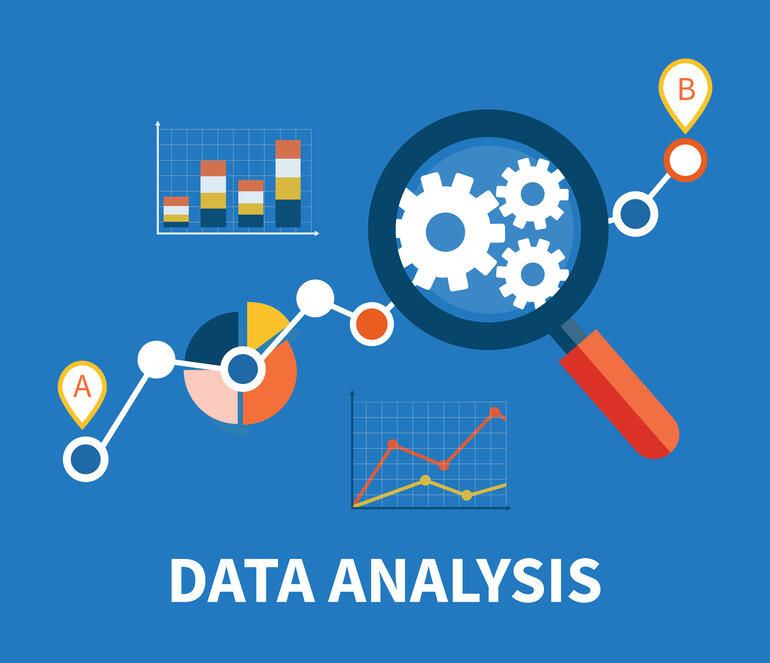


# Most rated movies

([0, 1, 2, 3, 4],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

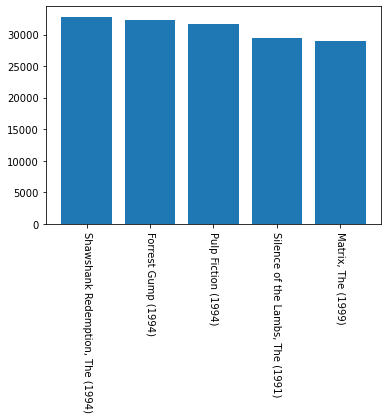

In [55]:
ratings_df = pd.merge(df_movies[['title','movieId']],df_train, on='movieId').drop('timestamp',axis=1)
most_rated = ratings_df.drop(["movieId","rating"],axis=1).groupby('title').count().sort_values('userId', ascending=False).head(5)
plt.bar(list(most_rated.index),list(most_rated['userId']))
plt.xticks(rotation=-90)

From the graph above  The Shawshank Redemption is the most rated movie,it is therefore a fair assumption to assume that it could be the most watched movie in our data set.



# Highest rated movies

([0, 1, 2, 3, 4],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

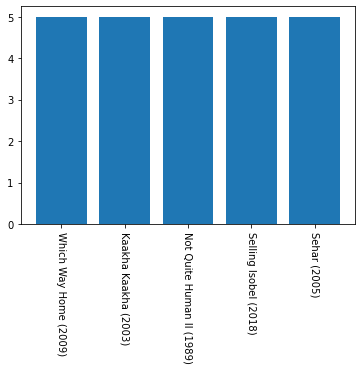

In [57]:
highest_rated=ratings_df.drop(["movieId"],axis=1).groupby('title').mean().sort_values(['rating'], ascending=False)
plt.bar(list(highest_rated[:5].index),list(highest_rated['rating'][:5]))
plt.xticks(rotation=-90)

We observe from the Top five highly rated movies are:Sehar, Selling Isobel,Not Quiet Human,Kaakha Kaakha,Which Way Home
            

**Genres with highest rating.**

In [59]:
genre_count=df_movies['genres'].value_counts().sort_values(ascending=False)
genre_count=pd.DataFrame(genre_count)
top_genre=genre_count[0:11]
top_genre

,genres
Drama,9056
Comedy,5674
(no genres listed),5062
Documentary,4731
Comedy|Drama,2386
Drama|Romance,2126
Horror,1661
Comedy|Romance,1577
Comedy|Drama|Romance,1044
Drama|Thriller,933


In [61]:
# To find the number of times a user rated a movie
user_df = pd.DataFrame(
    df_train['userId'].value_counts()).reset_index()
user_df.rename(columns={'index':'userId','userId':'count'},
                  inplace=True)
user_df.head(10)

,userId,count
0,72315,12952
1,80974,3680
2,137293,3588
3,33844,3208
4,20055,3050
5,109731,2671
6,49403,2670
7,92046,2579
8,110971,2288
9,30879,2284


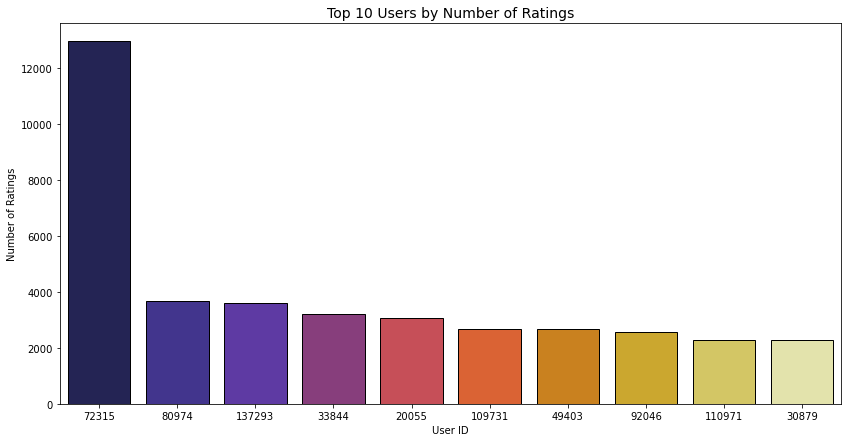

In [62]:
plt.figure(figsize=(14,7))
data = df_train['userId'].value_counts().head(10)
ax = sns.barplot(x = data.index, y = data, order= data.index, palette='CMRmap', edgecolor="black")
plt.title(f'Top 10 Users by Number of Ratings', fontsize=14)
plt.xlabel('User ID')
plt.ylabel('Number of Ratings')
plt.show()

The above output shows that user the with id **72315** has the highest rating count of **12952**

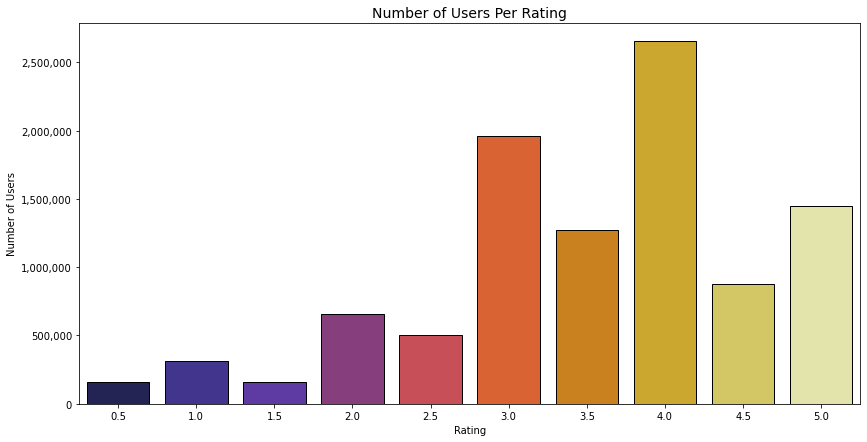

In [63]:
movieRating_Group = df_train['rating'].value_counts().sort_index().reset_index()
fig, ax = plt.subplots(figsize=(14,7))
sns.barplot(data=movieRating_Group, x='index', y='rating', palette="CMRmap", edgecolor="black", ax=ax)
ax.set_xlabel("Rating")
ax.set_ylabel('Number of Users')
ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])
total = float(movieRating_Group['rating'].sum())
plt.title('Number of Users Per Rating', fontsize=14)
plt.show()

**Most common Genres**

In [64]:
# Create dataframe containing only the movieId and genres
movies_genres = pd.DataFrame(df_movies[['movieId', 'genres']],
                             columns=['movieId', 'genres'])

# Split genres seperated by "|" and create a list containing the genres allocated to each movie
movies_genres.genres = movies_genres.genres.apply(lambda x: x.split('|'))

# Create expanded dataframe where each movie-genre combination is in a seperate row
movies_genres = pd.DataFrame([(tup.movieId, d) for tup in movies_genres.itertuples() for d in tup.genres],
                             columns=['movieId', 'genres'])

movies_genres.head()

,movieId,genres
0,1,Adventure
1,1,Animation
2,1,Children
3,1,Comedy
4,1,Fantasy


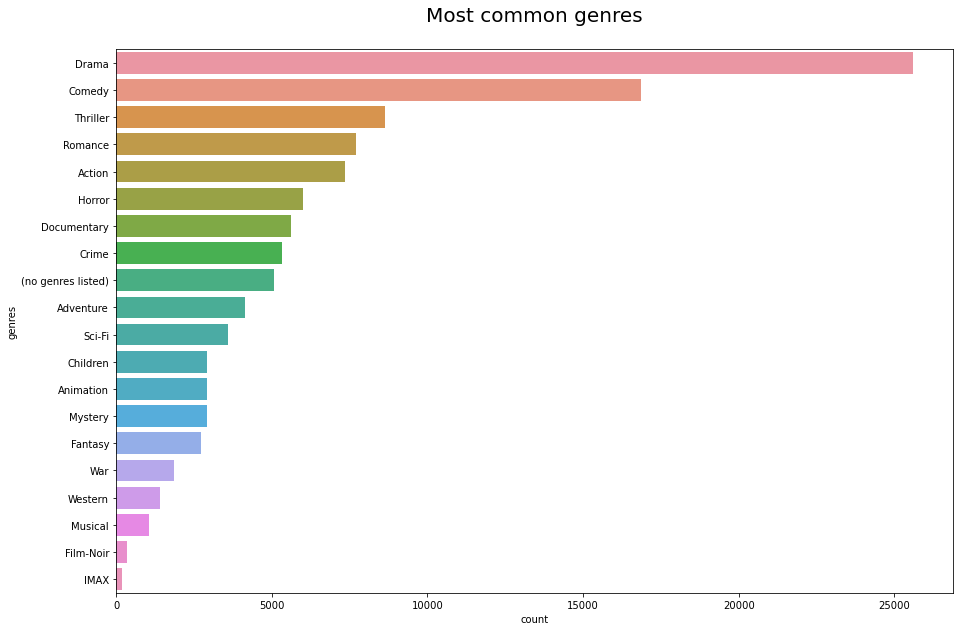

In [65]:
# Plot the genres from most common to least common
plot = plt.figure(figsize=(15, 10))
plt.title('Most common genres\n', fontsize=20)
sns.countplot(y="genres", data=movies_genres,
              order=movies_genres['genres'].value_counts(ascending=False).index)
plt.show()

In [ ]:
from

In [69]:
dates = []
for title in df_movies['title']:
    if title[-1] == " ":
        year = title[-6: -2]
        try:
            dates.append(int(year))
        except:
            dates.append(9999)
    else:
        year = title[-5: -1]
        try:
            dates.append(int(year))
        except:
            dates.append(9999)

df_movies['Year'] = dates

**Years in which movies were released**

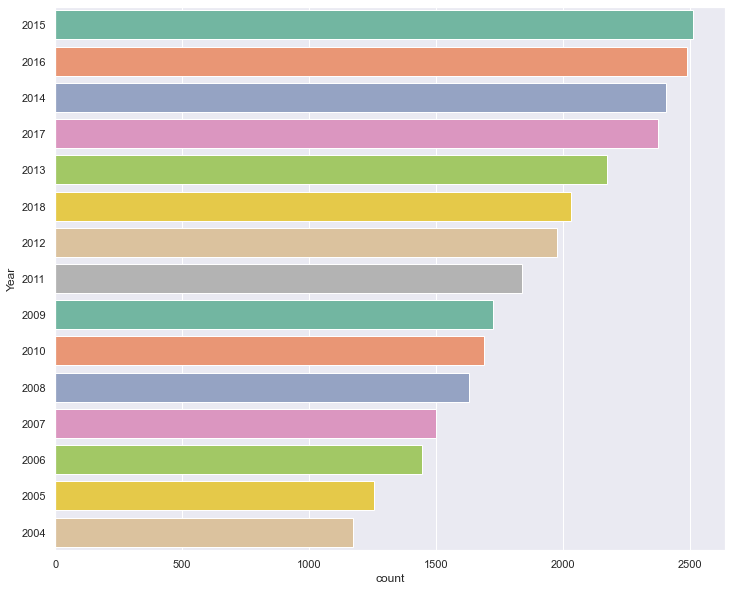

In [72]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="Year", data=df_movies, palette="Set2", order=df_movies['Year'].value_counts().index[0:15])

So, **1995** was the year when most of the movies were released.

In [73]:
dataset.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Shawshank Redemption, The (1994)    32831
Forrest Gump (1994)                 32383
Pulp Fiction (1994)                 31697
Silence of the Lambs, The (1991)    29444
Matrix, The (1999)                  29014
Name: rating, dtype: int64

In [74]:
ratings = pd.DataFrame(dataset.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
"""BLOW THE NIGHT!"" Let's Spend the Night Together (1983)",3.000000
"""Great Performances"" Cats (1998)",2.753731
#1 Cheerleader Camp (2010),1.900000
#Female Pleasure (2018),4.000000
#FollowMe (2019),2.400000


In [75]:
ratings['num of ratings'] = pd.DataFrame(dataset.groupby('title')['rating'].count())
ratings.head()

,rating,num of ratings
title,,
"""BLOW THE NIGHT!"" Let's Spend the Night Together (1983)",3.000000,1
"""Great Performances"" Cats (1998)",2.753731,67
#1 Cheerleader Camp (2010),1.900000,5
#Female Pleasure (2018),4.000000,1
#FollowMe (2019),2.400000,5


In [79]:
years = []

for title in df_movies['title']:
    yearpub_subset = title[-5:-1]
    try: years.append(int(yearpub_subset))
    except: years.append(9999)
        
df_movies['yearpub'] = years
print(len(df_movies[df_movies['yearpub'] == 9999]))

562


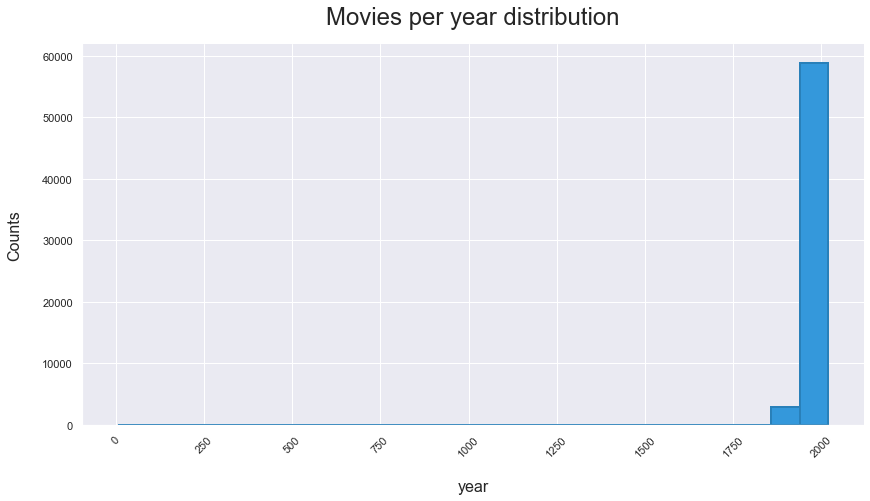

In [80]:
def make_histogram(dataset, attribute, bins=25, bar_color='#3498db', edge_color='#2980b9', title='Title', xlab='X', ylab='Y', sort_index=False):
    if attribute == 'yearpub':
        dataset = dataset[dataset['yearpub'] != 9999]
        
    fig, ax = plt.subplots(figsize=(14, 7))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_title(title, fontsize=24, pad=20)
    ax.set_xlabel(xlab, fontsize=16, labelpad=20)
    ax.set_ylabel(ylab, fontsize=16, labelpad=20)
    
    plt.hist(dataset[attribute], bins=bins, color=bar_color, ec=edge_color, linewidth=2)
    
    plt.xticks(rotation=45)
    
    
make_histogram(df_movies, 'yearpub', title='Movies per year distribution', xlab='year', ylab='Counts')

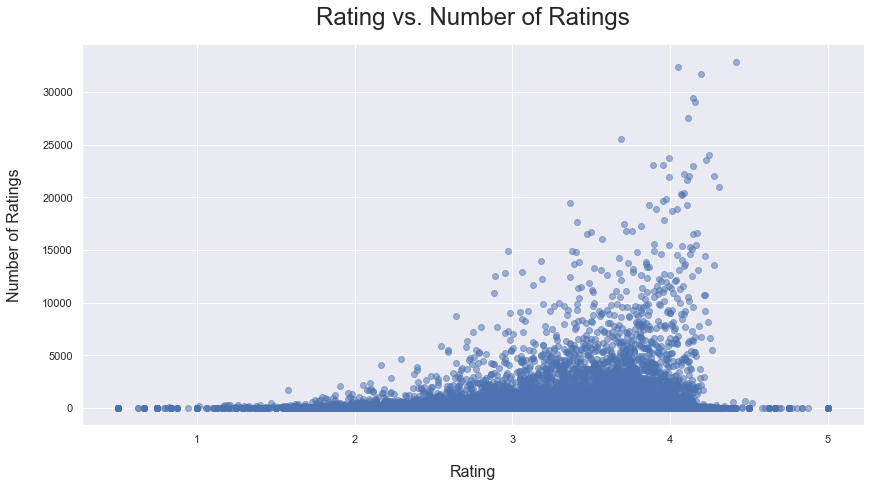

In [81]:
ratings_df = pd.DataFrame()
ratings_df['Mean_Rating'] = dataset.groupby('title')['rating'].mean().values
ratings_df['Num_Ratings'] = dataset.groupby('title')['rating'].count().values


fig, ax = plt.subplots(figsize=(14, 7))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title('Rating vs. Number of Ratings', fontsize=24, pad=20)
ax.set_xlabel('Rating', fontsize=16, labelpad=20)
ax.set_ylabel('Number of Ratings', fontsize=16, labelpad=20)

plt.scatter(ratings_df['Mean_Rating'], ratings_df['Num_Ratings'], alpha=0.5)

# Actors 

# Directors

In [88]:
def count_directors(df, count = 10):
    directors = pd.DataFrame(df['director'].value_counts()).reset_index()
    directors.columns = ['director', 'count']
    # Lets only take directors who have made 10 or more movies otherwise we will have to analyze 11000 directors
    directors = directors[directors['count']>=count]
    return directors.sort_values('count', ascending = False)

In [89]:
def feature_count(df, column):
    plt.figure(figsize=(14,7))
    ax = sns.barplot(x = df[f'{column}'], y= df['count'], palette='Greens_r')
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), fontsize=11, ha='center', va='bottom')
    plt.title(f'Number of Movies Per {column}', fontsize=14)
    plt.xlabel(f'{column}')
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()

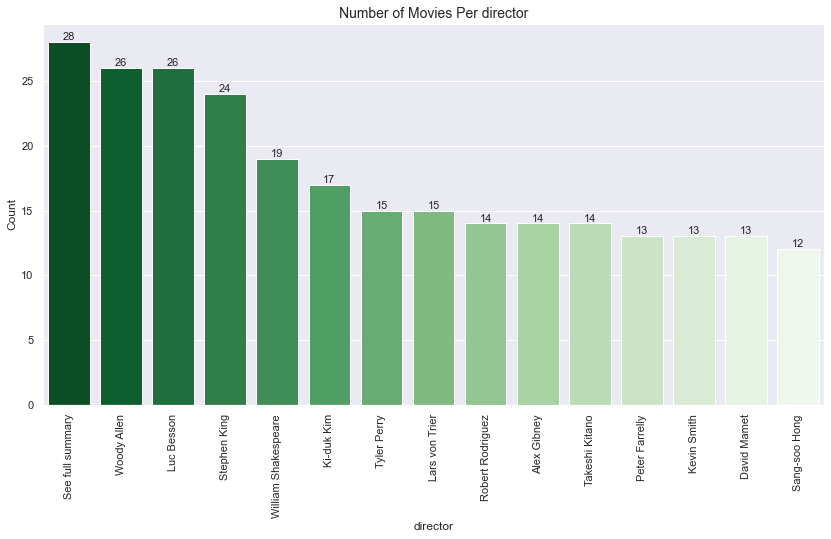

In [91]:
directors = count_directors(df_imdb)
feature_count(directors.head(15), 'director')

## Data Preparation and cleaning

In [20]:
df_train['rating'].value_counts()

4.0    2652977
3.0    1959759
5.0    1445230
3.5    1270642
4.5     880516
2.0     656821
2.5     505578
1.0     311213
1.5     159731
0.5     157571
Name: rating, dtype: int64

In [4]:
x = df_train['userId'].value_counts() > 500
y = x[x].index  #user_ids
print(y.shape)
users = df_train.sample(n = 500000, replace = False)
len(users)

(1551,)


500000

### Matrix Factorization-based Algorithm

In [5]:
#splitting data
train_data=users.iloc[:int(users.shape[0]*0.80)]
test_data=users.iloc[int(users.shape[0]*0.80):] 
train_data.drop(['timestamp'], 1, inplace = True)
test_data.drop(['timestamp'], 1, inplace = True)

In [6]:
#check shape
train_data.shape, test_data.shape

((400000, 3), (100000, 3))

In [7]:
## Here you will sort your data out and process it accordingly
# This  specifies how to read the data frame.
init_reader = Reader(rating_scale=(1,5))

# create the traindata from the data frame
train_data_mf = Dataset.load_from_df(train_data[['userId', 'movieId', 'rating']], init_reader)
# build the train set from traindata. 
#It is of dataset format from surprise library
trainset = train_data_mf.build_full_trainset()


In [8]:
init_reader = Reader(rating_scale=(1,5))

# create the traindata from the data frame
test_data_mf = Dataset.load_from_df(test_data[['userId', 'movieId', 'rating']], init_reader)
# build the train set from traindata. 
#It is of dataset format from surprise library
testset = test_data_mf.build_full_trainset()


In [9]:
svd = SVD(n_factors=100, biased=True, random_state=15, verbose=True)
svd.fit(trainset)

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19


## Modelling phase




In [21]:
#getting predictions of train set
train_preds = svd.test(trainset.build_testset())
train_pred_mf = np.array([pred.est for pred in train_preds])
train_pred_mf

array([2.52607122, 3.18873575, 4.0609979 , ..., 3.9800159 , 3.46368535,
       3.78495266])

In [11]:
#getting predictions of testset
test_preds = svd.test(testset.build_testset())

test_pred_mf = np.array([pred.est for pred in test_preds])

In [24]:
#RMSE for trainset
algo_rmse = accuracy.rmse(train_preds)
algo_rmse 

RMSE: 0.6634


0.6634204747061473

In [25]:
#RMSE for testset
algo_rmse1 = accuracy.rmse(test_preds)
algo_rmse1 

RMSE: 0.9299


0.9298961867438427

In [29]:
pred = pd.DataFrame(train_preds)
pred=pred.rename(columns={'uid':'userId', 'iid':'movieId','est':'rating'})
pred.drop(['r_ui','details'],axis=1,inplace=True)
pred.head()

,userId,movieId,rating
0,101928,186,2.526071
1,101928,1544,3.188736
2,112631,4963,4.060998
3,112631,31685,2.910308
4,29367,2881,3.137705


In [30]:
pred1 = pd.DataFrame(test_preds)
pred1=pred1.rename(columns={'uid':'userId', 'iid':'movieId','est':'rating'})
pred1.drop(['r_ui','details'],axis=1,inplace=True)
pred1.head()

,userId,movieId,rating
0,98334,112290,4.418536
1,98334,78349,3.802737
2,98334,924,4.780714
3,98334,3535,4.371402
4,98334,201646,4.261875


In [31]:
svdpp_model = SVDpp(n_epochs=20,n_factors=400,init_std_dev=0.001,random_state=42, verbose=True)
svdpp_model.fit(trainset)
svdpp_predictions = svdpp_model.test(testset)
svdpp_rmse = accuracy.rmse(svdpp_predictions)
svdpp_rmse

 processing epoch 0
 processing epoch 1
 processing epoch 2
 processing epoch 3
 processing epoch 4
 processing epoch 5
 processing epoch 6
 processing epoch 7
 processing epoch 8
 processing epoch 9
 processing epoch 10
 processing epoch 11
 processing epoch 12
 processing epoch 13
 processing epoch 14
 processing epoch 15
 processing epoch 16
 processing epoch 17
 processing epoch 18
 processing epoch 19


TypeError: 'Trainset' object is not iterable

In [42]:
rating_scale = Reader(rating_scale=(0.5, 5))
#train_df = Dataset.load_from_df(train.drop('timestamp', axis=1), rating_scale)
train_df = Dataset.load_from_df(users[['userId', 'movieId', 'rating']], rating_scale)

# Training and validation set split for hypertuning
trainset, testset = train_test_split(train_df,
                                      test_size=0.008,
                                      random_state=42)

# Modelling of the SVD hypertuning
svd_algo_hyper = SVD(n_factors=400, 
                     lr_all=0.0085,
                     reg_all=0.02,
                     n_epochs=40,
                     init_std_dev=0.01,
                     random_state=42)
svd_algo_hyper.fit(trainset)

# Predicting on the validation set
svd_hyper_predictions = svd_algo_hyper.test(testset)

acc = accuracy.rmse(svd_hyper_predictions)
acc

RMSE: 0.9271


0.9270729006710832

# Generate your outputs here

Prepare Submission File
We make submissions in CSV files. Your submissions usually have two columns: an ID column and a prediction column. The ID field comes from the test data (keeping whatever name the ID field had in that data, which for the data is the string 'Id'). The prediction column will use the name of the target field.

We will create a DataFrame with this data, and then use the dataframe's to_csv method to write our submission file. Explicitly include the argument index=False to prevent pandas from adding another column in our csv file.

In [37]:
pred_svd_hyper = [svd_algo_hyper.predict(row.userId,
                                         row.movieId) for idx,row in df_test.iterrows()]

# Converting the predictions to a dataframe
test_pred_svd_hyper = pd.DataFrame(pred_svd_hyper)


### Make Submission
Hit the blue Publish button at the top of your notebook screen. It will take some time for your kernel to run. When it has finished your navigation bar at the top of the screen will have a tab for Output. This only shows up if you have written an output file (like we did in the Prepare Submission File step).

Example below of how the output would look once published

In [38]:
# Rename the fields in the prediction dataframe
test_pred_svd_hyper.drop(['r_ui', 'details'], axis=1, inplace=True)
test_pred_svd_hyper = test_pred_svd_hyper.rename(columns={'uid':'userId',
                                                          'iid':'movieId',
                                                          'est':'rating'})
test_pred_svd_hyper.head()

,userId,movieId,rating
0,1,2011,3.446653
1,1,4144,4.065873
2,1,5767,3.452344
3,1,6711,3.745167
4,1,7318,3.138454


In [39]:
# Concatenate each userId and movieId into a single Id column for submission
test_pred_svd_hyper['Id'] =  test_pred_svd_hyper['userId'].astype(str).str.zfill(1) + '_' + test_pred_svd_hyper['movieId'].astype(str).str.zfill(1)

In [40]:
svd_hyper_predictions = test_pred_svd_hyper[['Id','rating']]
svd_hyper_predictions.head()

,Id,rating
0,1_2011,3.446653
1,1_4144,4.065873
2,1_5767,3.452344
3,1_6711,3.745167
4,1_7318,3.138454


In [41]:
svd_hyper_predictions.to_csv('submission1.csv', index=False)